2.19.0
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Feature shape: (784,)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
192/192 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.8096 - loss: 0.6852 - val_accuracy: 0.9505 - val_loss: 0.1793
Epoch 2/5
192/192 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.9549 - loss: 0.1595 - val_accuracy: 0.9647 - val_loss: 0.1245
Epoch 3/5
192/192 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9704 - loss: 0.1030 - val_accuracy: 0.9702 - val_loss: 0.1014
Epoch 4/5
192/192 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9778 - loss: 0.0755 - val_accuracy: 0.9702 - val_loss: 0.0948
Epoch 5/5
192/192 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9845 - loss: 0.0576 - val_accuracy: 0.9734 - val_loss: 0.0891
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9712 - loss: 0.0950
Test results - Loss: 0.08343043178319931 - Accuracy: 0.9745000004768372
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


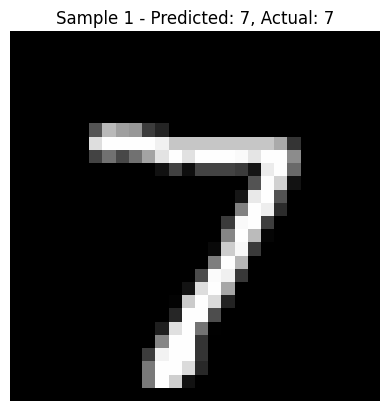

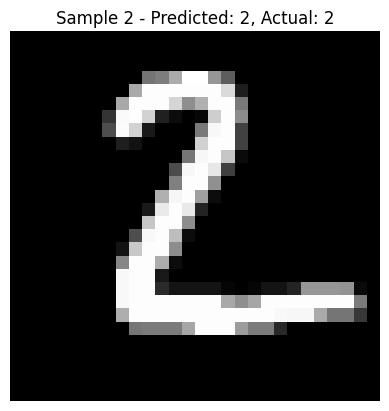

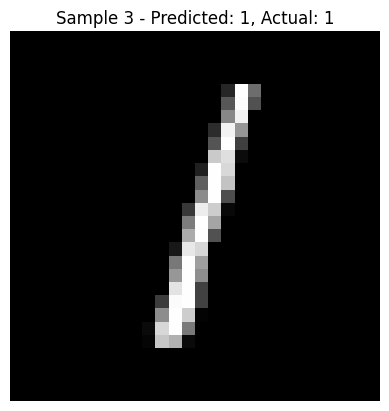

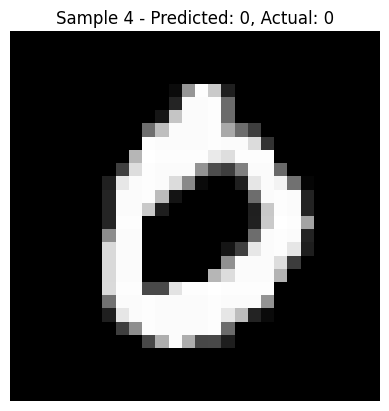

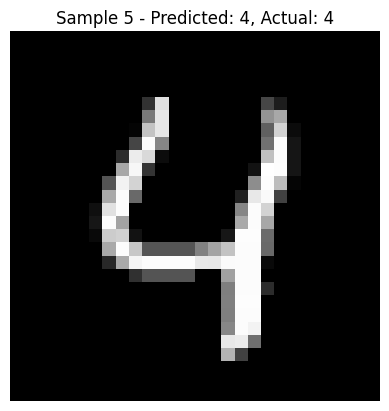

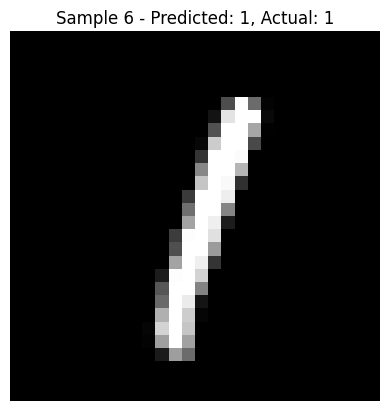

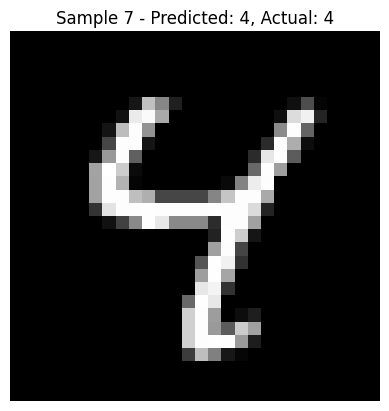

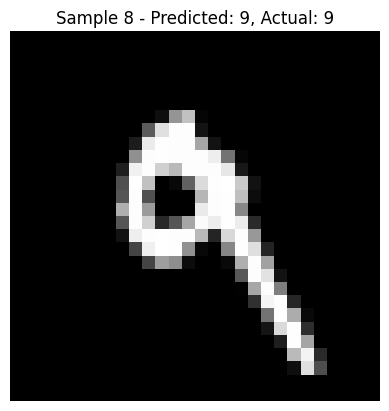

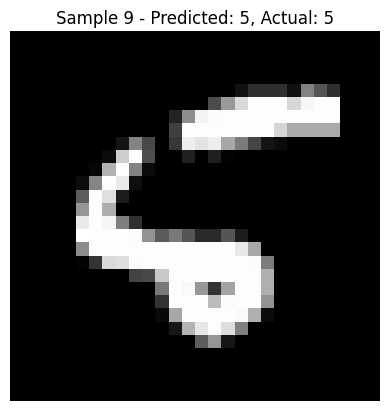

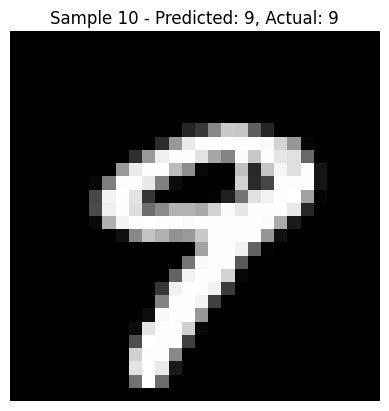

In [ ]:
#EXP 1 - CREATE_A_NEURAL_NETWORK_TO_RECOGNIZE_HANDWRITTEN_DIGITS_USING_MNIST_DATASET

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

import tensorflow as tf
print(tf.__version__)

feature_vector_length = 784
num_classes = 10
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
input_shape = (feature_vector_length,)
print(f'Feature shape: {input_shape}')

X_train = X_train.reshape(X_train.shape[0], feature_vector_length)
X_test = X_test.reshape(X_test.shape[0], feature_vector_length)
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
Y_train = to_categorical(Y_train, num_classes)
Y_test = to_categorical(Y_test, num_classes)

model = Sequential()
model.add(Dense(350, input_shape=input_shape, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=5, batch_size=250, verbose=1, validation_split=0.2)

test_results = model.evaluate(X_test, Y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}')

predictions = model.predict(X_test[:10])
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(Y_test[:10], axis=1)

for i in range(10):
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Sample {i+1} - Predicted: {predicted_classes[i]}, Actual: {true_classes[i]}")
    plt.axis('off')
    plt.show()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7666 - loss: 0.7276 - val_accuracy: 0.9743 - val_loss: 0.0880
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9516 - loss: 0.1589 - val_accuracy: 0.9797 - val_loss: 0.0666
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9680 - loss: 0.1103 - val_accuracy: 0.9840 - val_loss: 0.0521
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9716 - loss: 0.0944 - val_accuracy: 0.9871 - val_loss: 0.0489
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9770 - loss: 0.0782 - val_accuracy: 0.9880 - val_loss: 0.0421
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9855 - loss: 0.0418

 Test accuracy: 0.9886
 Test loss: 0.0340


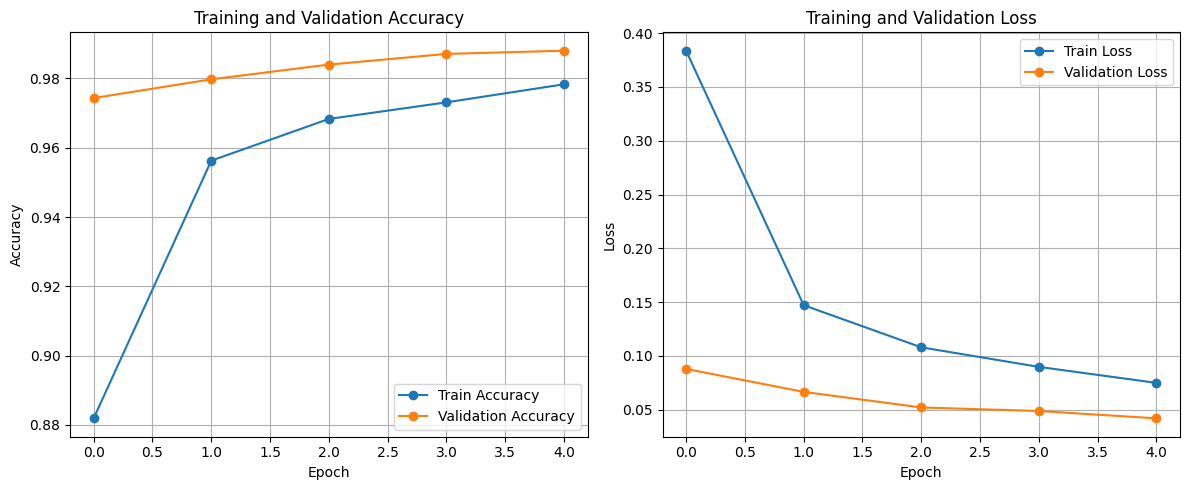

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


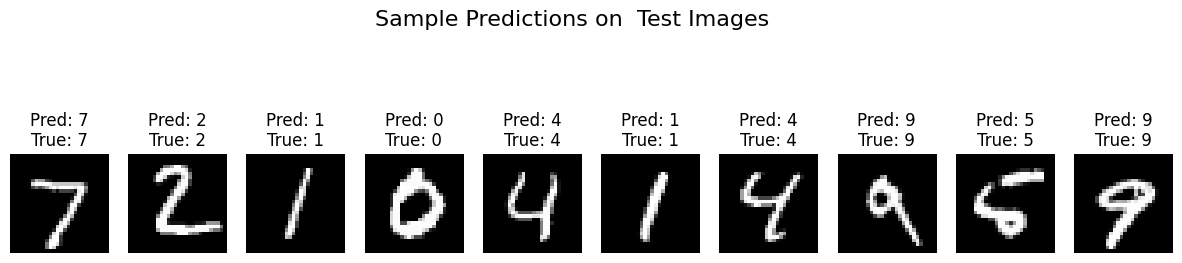

In [ ]:
#EXP2 - BUILD_A_CONVOLUTIONAL_NEURAL_NETWORK _USING_KERAS_TENSORFLOW

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels,
                    epochs=5,
                    batch_size=64,
                    validation_split=0.2)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"\n Test accuracy: {test_acc:.4f}")
print(f" Test loss: {test_loss:.4f}")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

num_samples = 10
plt.figure(figsize=(15, 4))

for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {predicted_labels[i]}\nTrue: {test_labels[i]}")
    plt.axis('off')
plt.suptitle("Sample Predictions on  Test Images", fontsize=16)
plt.show()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step
Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.3006 - loss: 1.8725 - val_accuracy: 0.4827 - val_loss: 1.4297
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5209 - loss: 1.3330 - val_accuracy: 0.5671 - val_loss: 1.2179
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5912 - loss: 1.1502 - val_accuracy: 0.6108 - val_loss: 1.1102
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6349 - loss: 1.0339 - val_accuracy: 0.6343 - val_loss: 1.0401
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6690 - loss: 0.9378 - val_accuracy: 0.6451 - val_loss: 1.0338
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6909 - loss: 0.8819 - val_accuracy: 0.6561 - val_loss: 0.9934
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7018 - loss: 0.8491 - val_accuracy: 0.6860 - val_loss: 0.9186
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step

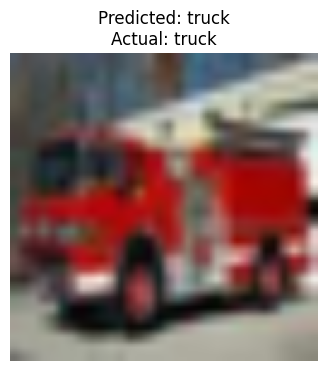

In [ ]:
#EXP3 - IMAGE_CLASSIFICATION_ON_CIFAR-10_DATASET_USING_CNN

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()


x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
'dog', 'frog', 'horse', 'ship', 'truck']

index = int(input("Enter an index (0 to 9999) for test image: "))
if index < 0 or index >= len(x_test):
    print("Invalid index. Using index 0 by default.")
    index = 0

test_image = x_test[index]
true_label = np.argmax(y_test[index])

prediction = model.predict(np.expand_dims(test_image, axis=0))
predicted_label = np.argmax(prediction)

plt.figure(figsize=(4, 4))
resized_image = tf.image.resize(test_image, [128, 128])
plt.imshow(resized_image)
plt.axis('off')
plt.title(f"Predicted: {class_names[predicted_label]}\nActual: {class_names[true_label]}")
plt.show()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


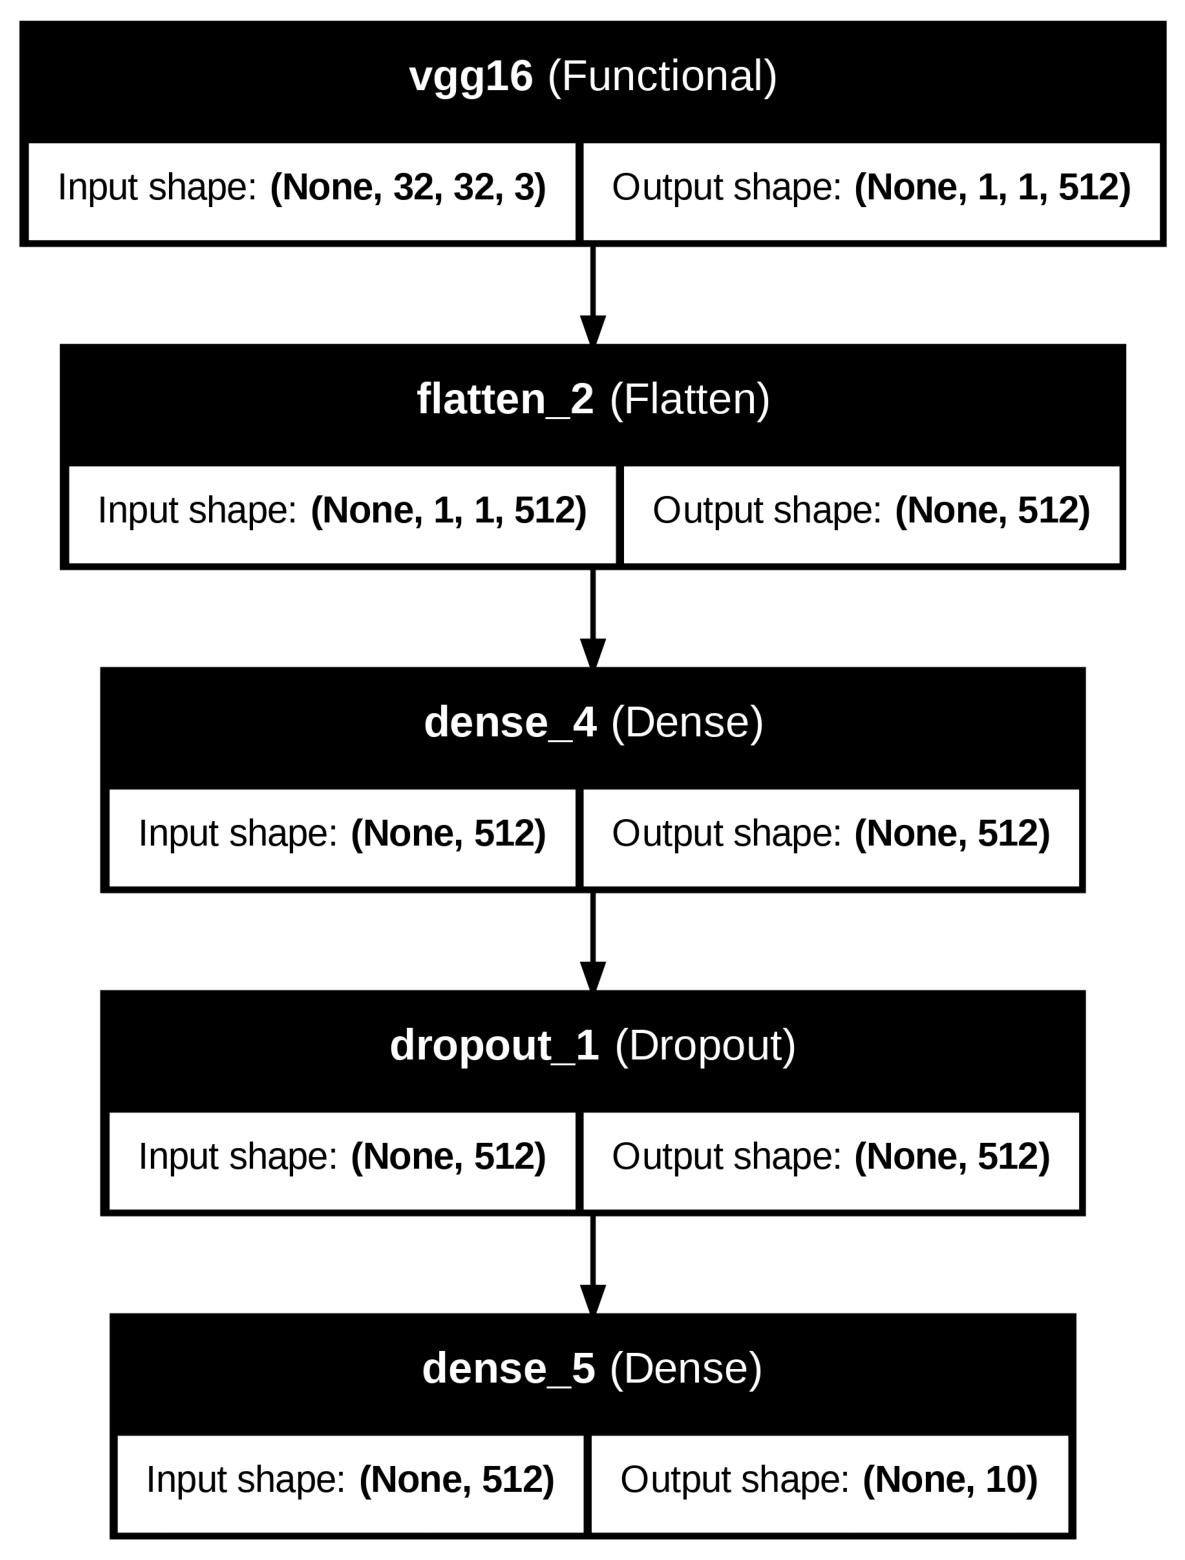

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.2835 - loss: 2.0116 - val_accuracy: 0.5042 - val_loss: 1.4662
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.4827 - loss: 1.4948 - val_accuracy: 0.5338 - val_loss: 1.3548
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.5215 - loss: 1.3883 - val_accuracy: 0.5516 - val_loss: 1.2985
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.5409 - loss: 1.3261 - val_accuracy: 0.5603 - val_loss: 1.2636
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.5559 - loss: 1.2842 - val_accuracy: 0.5708 - val_loss: 1.2352
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.5636 - loss: 1.2556 - val_accuracy: 0.5752 - val_loss: 1.2173
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.5735 - loss: 1.2283 - val_accuracy: 0.5807 - val_loss: 1.1986
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.5804 -

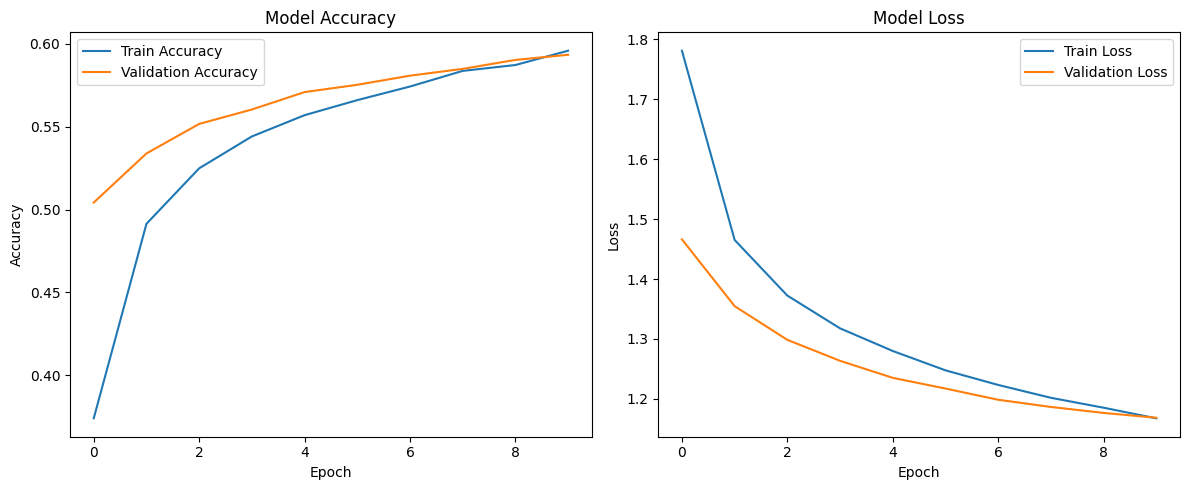

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


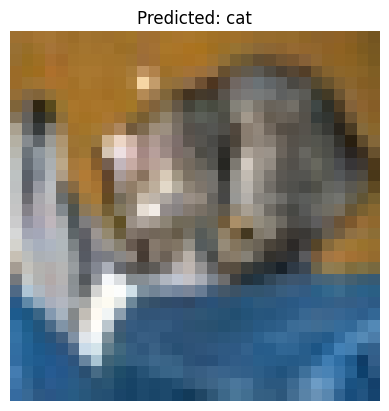

In [ ]:
#EXP4 - TRANSFER_LEARNING_WITH_CNN_AND_VISUALIZATION


import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import numpy as np

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

for layer in vgg_base.layers:
    layer.trainable = False

model = Sequential()
model.add(vgg_base)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

plot_model(model, to_file='cnn.png', show_shapes=True,
           show_layer_names=True, dpi=300)

plt.figure(figsize=(20, 20))
img = plt.imread('cnn.png')
plt.imshow(img)
plt.axis('off')
plt.show()

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_acc * 100:.2f}%')

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
'dog', 'frog', 'horse', 'ship', 'truck']

sample = x_test[0].reshape(1, 32, 32, 3)
prediction = model.predict(sample)
predicted_class = class_names[np.argmax(prediction)]

plt.imshow(x_test[0])
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()


In [ ]:
#EXP5 - BUILD_A_RECURRENT_NEURAL_NETWORK_(RNN)_USING_KERAS_TENSORFLOW

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import imdb

vocab_size = 10000
maxlen = 100  # Maximum review length (truncate/pad)


(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)


x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = keras.preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")

model = keras.Sequential()
model.add(layers.Embedding(input_dim=vocab_size, output_dim=32, input_length=maxlen))
model.add(layers.SimpleRNN(32, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2
)


test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

predictions = (model.predict(x_test[:5]) > 0.5).astype("int32")
print("Sample Predictions:", predictions.reshape(-1))
print("Actual Labels:", y_test[:5])

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (25000, 100)
Test data shape: (25000, 100)
Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.5628 - loss: 0.6754 - val_accuracy: 0.7512 - val_loss: 0.5201
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.8293 - loss: 0.3981 - val_accuracy: 0.7928 - val_loss: 0.4444
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9167 - loss: 0.2225 - val_accuracy: 0.7988 - val_loss: 0.4679
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9737 - loss: 0.0936 - val_accuracy: 0.7824 - val_loss: 0.5963
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9913 - loss: 0.0384 - val_accuracy: 0.8132 - val_loss: 0.6470
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9986 - loss: 0.0133 - val_accuracy: 0.8094 - val_loss: 0.7542
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9991 - loss: 0.0073 - val_accuracy: 0.7890 - val_loss: 0.8959
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9995 - loss: 0.0058 - val_accuracy: 0.8042 - 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step
Sample Predictions: [0 1 1 0 1]
Actual Labels: [0 1 1 0 1]


In [ ]:
#EXP6 - SENTIMENT_CLASSIFICATION_OF_TEXT_USING_RNN

import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

max_words = 5000
max_len = 200
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)
X_train = pad_sequences(x_train, maxlen=max_len)
X_test = pad_sequences(x_test, maxlen=max_len)

model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=32, input_length=max_len))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print("Training...")
model.fit(X_train, y_train, epochs=2, batch_size=64, validation_split=0.2)

loss, acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {acc:.4f}")
word_index = imdb.get_word_index()
reverse_word_index = {v: k for (k, v) in word_index.items()}

def decode_review(review):
    return " ".join([reverse_word_index.get(i - 3, "?") for i in review])
sample_review = X_test[0]
prediction = model.predict(sample_review.reshape(1, -1))[0][0]
print("\nReview text:", decode_review(x_test[0]))
print("Predicted Sentiment:", "Positive " if prediction > 0.5 else "Negative ")

Training...
Epoch 1/2


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.5613 - loss: 0.6678 - val_accuracy: 0.7226 - val_loss: 0.5465
Epoch 2/2
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.7961 - loss: 0.4460 - val_accuracy: 0.7784 - val_loss: 0.4775
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7804 - loss: 0.4774

Test Accuracy: 0.7839
1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step

Review text: ? please give this one a miss br br ? ? and the rest of the cast ? terrible performances the show is flat flat flat br br i don't know how michael ? could have allowed this one on his ? he almost seemed to know this wasn't going to work out and his performance was quite ? so all you ? fans give this a miss
Predicted Sentiment: Negative 


TensorFlow version: 2.19.0
Train shape: (60000, 784) Test shape: (10000, 784)


Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 218,192 (852.31 KB)

 Trainable params: 218,192 (852.31 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.0105 - loss: 0.3197 - val_accuracy: 0.0137 - val_loss: 0.1429
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0116 - loss: 0.1335 - val_accuracy: 0.0106 - val_loss: 0.1118
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0114 - loss: 0.1099 - val_accuracy: 0.0150 - val_loss: 0.1008
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0120 - loss: 0.1003 - val_accuracy: 0.0123 - val_loss: 0.0947
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0115 - loss: 0.0950 - val_accuracy: 0.0110 - val_loss: 0.0911
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0119 - loss: 0.0915 - val_accuracy: 0.0139 - val_loss: 0.0885
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0124 - loss: 0.0890 - val_accuracy: 0.0137 - val_loss: 0.0876
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0134 - loss: 0.0872 - val_accuracy: 0

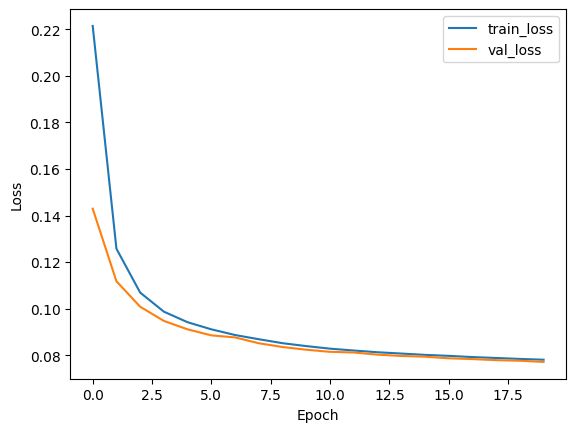

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Reconstruction MSE: 0.005199
Reconstruction Accuracy (thresholded): 0.9806


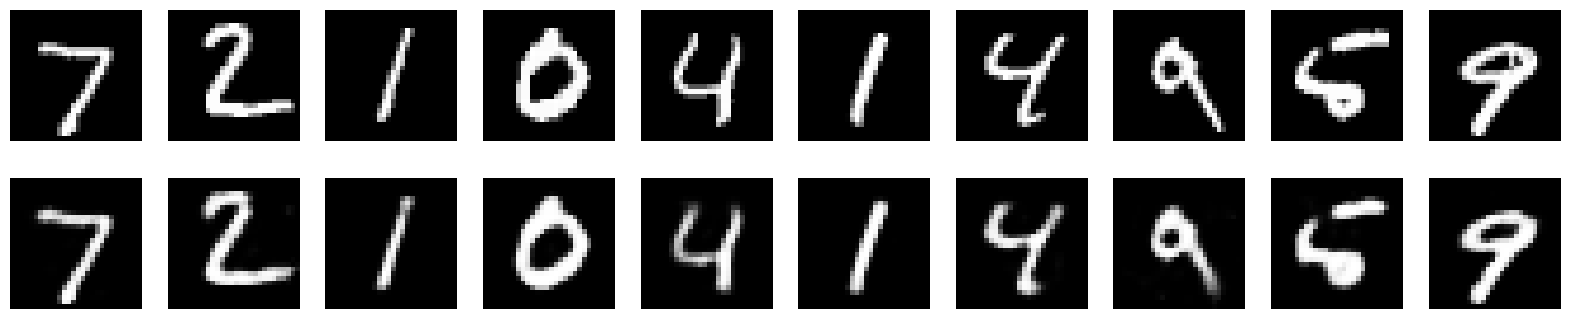

In [ ]:
#EXP7 - BUILD_AUTOENCODERS_WITH_KERAS_TENSORFLOW

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print("TensorFlow version:", tf.__version__)

(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()

# Normalize and flatten
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = x_train.reshape((len(x_train), 28*28))
x_test = x_test.reshape((len(x_test), 28*28))

print("Train shape:", x_train.shape, "Test shape:", x_test.shape)

encoding_dim = 64  # compressed representation size

input_img = keras.Input(shape=(784,))
# Encoder
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(encoding_dim, activation='relu')(encoded)
# Decoder
decoded = layers.Dense(128, activation='relu')(encoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

autoencoder = keras.Model(input_img, decoded)

autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
autoencoder.summary()

history = autoencoder.fit(
    x_train, x_train,  # target is the same as input
    epochs=20,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test)
)

# Plot training loss
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

decoded_imgs = autoencoder.predict(x_test)

# Calculate Mean Squared Error as reconstruction performance metric
mse = np.mean(np.square(x_test - decoded_imgs))
print(f"Reconstruction MSE: {mse:.6f}")

# (Optional) Calculate average accuracy on reconstructed vs original binary thresholded images
x_test_bin = (x_test > 0.5).astype(int)
decoded_bin = (decoded_imgs > 0.5).astype(int)
accuracy = np.mean(x_test_bin == decoded_bin)
print(f"Reconstruction Accuracy (thresholded): {accuracy:.4f}")

# Visualize Original vs Reconstructed Images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    # Reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()

Please upload an image for detection...


Saving Screenshot 2025-10-14 215143.png to Screenshot 2025-10-14 215143.png
Uploaded image: Screenshot 2025-10-14 215143.png


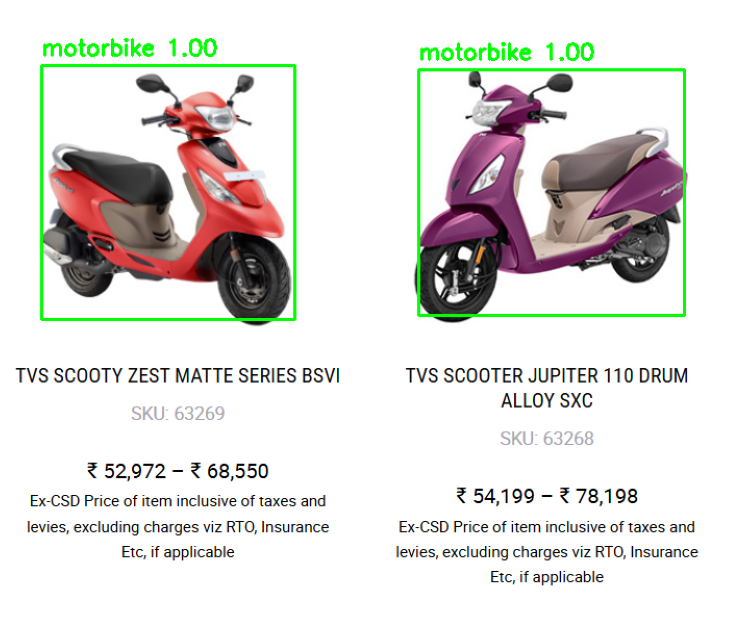

In [ ]:
# EXP8 - PERFORM_OBJECT_DETECTION_USING_YOLO

import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

# ---------------------------------------------
# STEP 1 — Download YOLO Files (CFG, WEIGHTS, NAMES)
# ---------------------------------------------
!wget -q https://pjreddie.com/media/files/yolov3.weights
!wget -q https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
!wget -q https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names

cfg_file = "/content/yolov3.cfg"
weight_file = "/content/yolov3.weights"
names_file = "/content/coco.names"

# ---------------------------------------------
# STEP 2 — Load YOLO Model Correctly
# ---------------------------------------------
net = cv2.dnn.readNetFromDarknet(cfg_file, weight_file)

# Load class names
with open(names_file, "r") as f:
    classes = f.read().strip().split("\n")

# ---------------------------------------------
# STEP 3 — Upload Image
# ---------------------------------------------
print("Please upload an image for detection...")
uploaded = files.upload()
image_path = list(uploaded.keys())[0]
print("Uploaded:", image_path)

# Read uploaded image
image = cv2.imread("/content/" + image_path)

if image is None:
    raise ValueError("❌ Image load failed. Please upload a valid image.")

height, width = image.shape[:2]

# ---------------------------------------------
# STEP 4 — Prepare Input Blob
# ---------------------------------------------
blob = cv2.dnn.blobFromImage(
    image, 1/255.0, (416, 416),
    swapRB=True, crop=False
)
net.setInput(blob)

# YOLO output layers
layer_names = net.getUnconnectedOutLayersNames()

# Forward pass
outputs = net.forward(layer_names)

# ---------------------------------------------
# STEP 5 — Process Detections
# ---------------------------------------------
boxes = []
confidences = []
class_ids = []

conf_threshold = 0.5
nms_threshold = 0.4

for output in outputs:
    for detection in output:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]

        if confidence > conf_threshold:
            cx = int(detection[0] * width)
            cy = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            x = int(cx - w / 2)
            y = int(cy - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

# Non-Max Suppression
indices = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)

# ---------------------------------------------
# STEP 6 — Draw Bounding Boxes
# ---------------------------------------------
for i in indices.flatten():
    x, y, w, h = boxes[i]
    label = classes[class_ids[i]]
    conf = confidences[i]

    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.putText(
        image,
        f"{label} {conf:.2f}",
        (x, y - 10),
        cv2.FONT_HERSHEY_SIMPLEX,
        0.7,
        (0, 255, 0),
        2
    )

# ---------------------------------------------
# STEP 7 — Display Output
# ---------------------------------------------
plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/backend/tensorflow/trainer.py:83: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


Epoch 0/200 | D Loss: 0.8169 | G Loss: 0.6840
Epoch 20/200 | D Loss: 0.7722 | G Loss: 0.6891
Epoch 40/200 | D Loss: 0.7744 | G Loss: 0.6835
Epoch 60/200 | D Loss: 0.7769 | G Loss: 0.6767
Epoch 80/200 | D Loss: 0.7806 | G Loss: 0.6676
Epoch 100/200 | D Loss: 0.7863 | G Loss: 0.6575
Epoch 120/200 | D Loss: 0.7927 | G Loss: 0.6471
Epoch 140/200 | D Loss: 0.8007 | G Loss: 0.6349
Epoch 160/200 | D Loss: 0.8083 | G Loss: 0.6223
Epoch 180/200 | D Loss: 0.8164 | G Loss: 0.6101


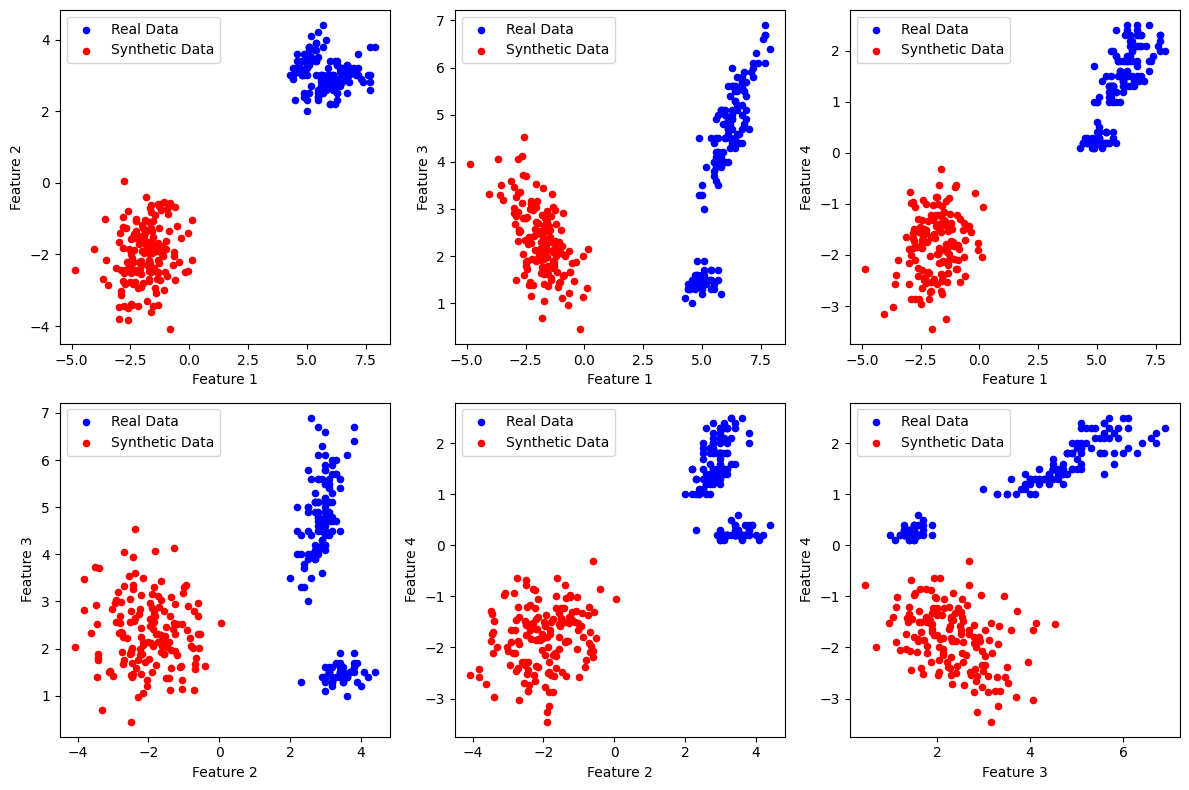

In [ ]:
#EXP9 - BUILD_GAN_WITH_KERAS_TENSORFLOW

import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load dataset
iris = load_iris()
x_train = iris.data  # shape (150, 4)

# ---------- Generator ----------
def build_generator():
    model = Sequential()
    model.add(Dense(128, input_shape=(100,), activation='relu'))
    model.add(Dense(4, activation='linear'))  # output = 4 features
    return model

# ---------- Discriminator ----------
def build_discriminator():
    model = Sequential()
    model.add(Dense(128, input_shape=(4,), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

# ---------- Full GAN ----------
def build_gan(generator, discriminator):
    discriminator.trainable = False  # Freeze discriminator when training GAN
    model = Sequential([generator, discriminator])
    return model

# Build models
generator = build_generator()
discriminator = build_discriminator()
gan = build_gan(generator, discriminator)

# Compile models
generator.compile(loss='mean_squared_error', optimizer=Adam(0.0002, 0.5))
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5),
                      metrics=['accuracy'])
gan.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))

# ---------- Training ----------
epochs = 200
batch_size = 16

for epoch in range(epochs):
    # Pick random real samples
    idx = np.random.randint(0, x_train.shape[0], batch_size)
    real_samples = x_train[idx]

    # Generate fake samples
    noise = np.random.normal(0, 1, (batch_size, 100))
    fake_samples = generator.predict(noise, verbose=0)

    # Labels
    real_labels = np.ones((batch_size, 1))
    fake_labels = np.zeros((batch_size, 1))

    # Train discriminator
    d_loss_real = discriminator.train_on_batch(real_samples, real_labels)
    d_loss_fake = discriminator.train_on_batch(fake_samples, fake_labels)
    d_loss = 0.5 * (d_loss_real[0] + d_loss_fake[0])

    # Train generator via GAN
    noise = np.random.normal(0, 1, (batch_size, 100))
    g_loss = gan.train_on_batch(noise, real_labels)

    if epoch % 20 == 0:
        print(f"Epoch {epoch}/{epochs} | D Loss: {d_loss:.4f} | G Loss: {g_loss:.4f}")

# ---------- Generate synthetic samples ----------
synthetic_data = generator.predict(np.random.normal(0, 1, (150, 100)), verbose=0)

# ---------- Plot Results ----------
plt.figure(figsize=(12, 8))
plot_idx = 1

for i in range(4):
    for j in range(i + 1, 4):
        plt.subplot(2, 3, plot_idx)
        plt.scatter(x_train[:, i], x_train[:, j], label='Real Data', c='blue', s=20)
        plt.scatter(synthetic_data[:, i], synthetic_data[:, j], label='Synthetic Data', c='red', s=20)
        plt.xlabel(f'Feature {i+1}')
        plt.ylabel(f'Feature {j+1}')
        plt.legend()
        plot_idx += 1

plt.tight_layout()
plt.show()


In [16]:
!ls /content


 cnn.png      sample_data			  yolov3.cfg
 coco.names  'Screenshot 2025-10-14 215143.png'   yolov3.weights
